In [1]:
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import epitopepredict as ep
from epitopepredict import base, sequtils, analysis, plotting
from mhcflurry import Class1AffinityPredictor

This code is used to compare the results for three virus SARS-CoV-2 obtained with a cutoff of 500nM or 1000nM for strong binding

In [3]:
# Load data
df1=pd.read_csv("../Data/Covid_summary_1000.csv")
df2=pd.read_csv("../Data/Covid_summary_500.csv")

In [9]:
df1["cutoff"]="1000nM"
df2["cutoff"]="500nM"

In [10]:
#Join data
dftot=df1.append(df2)

In [11]:
# divide df in HLA-A,B,C
HLAA4=dftot[dftot["allele"].str.contains("HLA-A")]
HLAB4=dftot[dftot["allele"].str.contains("HLA-B")]
HLAC4=dftot[dftot["allele"].str.contains("HLA-C")]

In [14]:
# sort
HLAA4=HLAA4.sort_values("peptide",ascending=True)
HLAB4=HLAB4.sort_values("peptide",ascending=True)
HLAC4=HLAC4.sort_values("peptide",ascending=True)

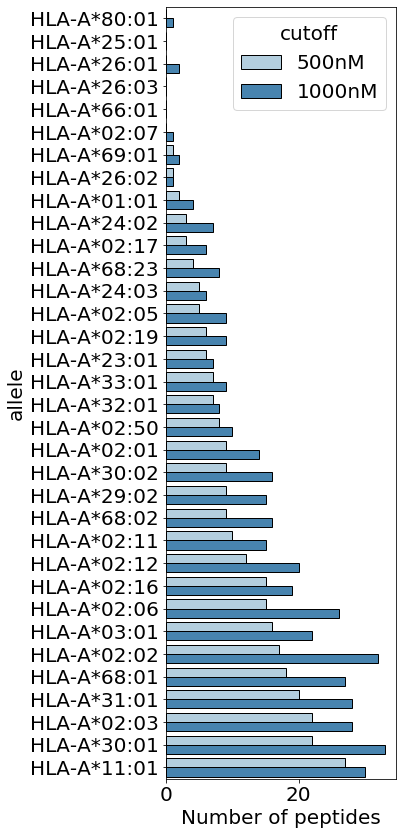

In [15]:
# Plot N peptides
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAA4,x="peptide",y="allele", palette='Blues', hue='cutoff', linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of peptides")
ax = plt.gcf()
ax.set_size_inches(6, 12)
plt.tight_layout()
plt.savefig("../FIGURES/compare-cutoff-A.png", dpi=150)

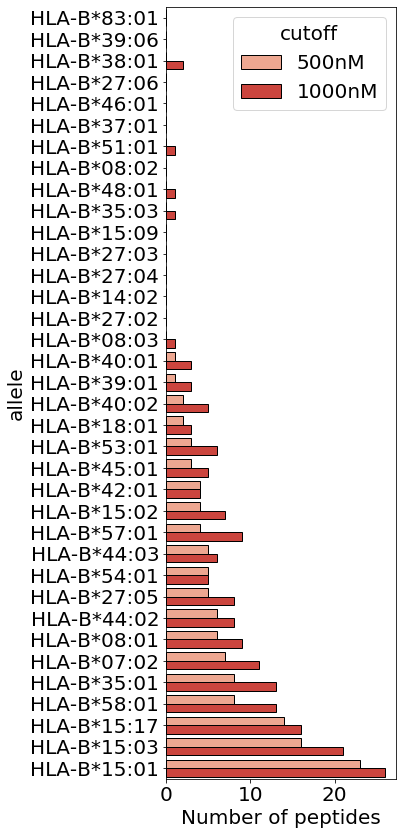

In [19]:
# Plot N peptides
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAB4,x="peptide",y="allele", palette='Reds', hue='cutoff', linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of peptides")
ax = plt.gcf()
ax.set_size_inches(6, 12)
plt.tight_layout()
plt.savefig("../FIGURES/compare-cutoff-B.png", dpi=150)

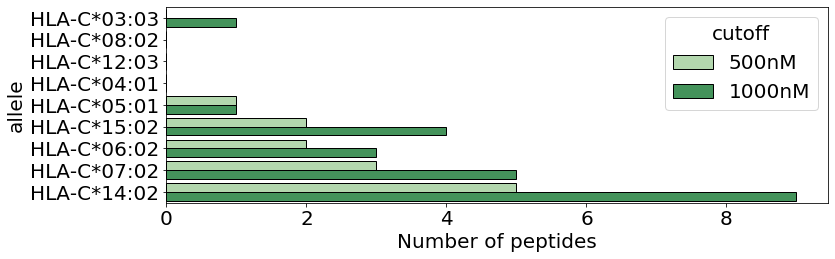

In [18]:
# Plot N peptides
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAC4,y="allele",x="peptide", palette='Greens', hue="cutoff", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of peptides")
ax = plt.gcf()
ax.set_size_inches(12, 4)
plt.tight_layout()
plt.savefig("../FIGURES/compare-cutoff-C.png", dpi=150)